<a href="https://colab.research.google.com/github/Marlrero/AI_PrimaryEducation/blob/main/fashion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Keras CNN으로 패션 아이템 구분

#### 1. import package & set hyperparameter

In [1]:
import matplotlib.pyplot as plt
from time import time
import numpy as np
from keras.datasets import fashion_mnist # dataset
from keras.models import Sequential
from keras.utils import np_utils # One-hot encoding
from keras.layers import Conv2D, Dense, Flatten, InputLayer, MaxPool2D

# hyperparameter
MY_EPOCH = 10
MY_BATCH = 500

#### 2. load dataset & Data preprocessing

In [2]:
(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()

# 훈련 데이터, 훈련 레이블, 검증 데이터, 검증 레이블
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

4423680/4422102 [==============================] - 0s 0us/step


((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

첫번째 데이터의 화소정보: [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1

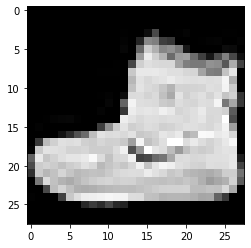

In [3]:
print("첫번째 데이터의 화소정보:", X_train[0])
print("첫번째 데이터의 라벨정보:", Y_train[0])

plt.imshow(X_train[0], cmap='gray')
plt.show()

In [4]:
# 0 ~ 1 사이의 정규화(Normalization)
X_train = X_train / 255.0
X_test - X_test / 255.0

X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [5]:
# 입력 데이터 모양 전환
# 60000*28*28 -> 60000*28*28*1(채널정보) 1:grayscale, 3:rgb
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

# 훈련 데이터, 훈련 레이블, 검증 데이터, 검증 레이블
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((60000, 28, 28, 1), (60000,), (10000, 28, 28, 1), (10000,))

In [6]:
# 라벨 데이터 One-hot encoding
Y_train = np_utils.to_categorical(Y_train, 10)
Y_test = np_utils.to_categorical(Y_test, 10)
Y_train[0] # 9

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

#### 3. CNN Model

In [7]:
model = Sequential()

# 28*28*1
model.add(InputLayer(input_shape=(X_train.shape[1], X_train.shape[2], X_train.shape[3])))

# filters=channel수
# kernel_size는 가로, 세로 크기가 같으면 하나만 씀 -> 2*2
# padding=same(입력과 출력 크기 동일)이면 K/2만큼 사방으로 해줌 -> 2/2 = 1
# output_shape = (input_shape - kernel_size + 2 * padding_size) / stride + 1 = (28 - 2 + 2*1) / 1 = 28
model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
# 28*28*32
# 파라미터 수 = (Kernel_size^2 * Input_Channels * Kernel_number) + Kernel_number
#             = 2^2 * 1 * 32 + 32 = 160

# pool_size는 가로, 세로 크기가 같으면 하나만 씀 -> 2*2
# stride=None(default -> pool_size)
# padding=valid(default)
# output_shape = (input_shape - pool_size + 1) / strides = 28 - 2 + 1 / 2 = 27 / 2 = 13.5 => 14
model.add(MaxPool2D(pool_size=2))
# 14*14*32 (필터는 pooling에선 유지됨)

# output_shape = (input_shape - kernel_size + 2 * padding_size) / stride + 1 = (14 - 2 + 2*1) / 1 = 14
model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
# 14*14*64
# 파라미터 수 = (Kernel_size^2 * Input_Channels * Kernel_number) + Kernel_number
#             = 2^2 * 32 * 64 + 64 = 8,256

# output_shape = (input_shape - pool_size + 1) / strides = 14 - 2 + 1 / 2 = 13 / 2 = 6.5 => 7
model.add(MaxPool2D(pool_size=2))
# 7*7*64

model.add(Flatten())
# 7*7*64 = 3,136

model.add(Dense(units=128, activation='relu'))
# 파라미터 수: 3,136 * 128 + 128(bias) = 401,408 + 128 = 401,536

model.add(Dense(units=10, activation='softmax'))
# 파라미터 수: 128 * 10 + 10(bias) = 1,280 + 10 = 1,290
# 분류 문제이므로 softmax (확률값 출력)
# 회귀 문제는 항등함수 사용

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        8256      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               401536    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

#### 4. Model training

In [8]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
# 교차엔트로피 손실 값과 정확도를 넘겨줌

begin = time()
model.fit(x=X_train, y=Y_train, epochs=MY_EPOCH, batch_size=MY_BATCH, verbose=1)
end =time()
print("learning time: {:.2f}sec".format(end - begin))

Epoch 1/10
120/120 [==============================] - 8s 10ms/step - loss: 1.0609 - acc: 0.6453
Epoch 2/10
120/120 [==============================] - 1s 10ms/step - loss: 0.3984 - acc: 0.8594
Epoch 3/10
120/120 [==============================] - 1s 10ms/step - loss: 0.3497 - acc: 0.8750
Epoch 4/10
120/120 [==============================] - 1s 10ms/step - loss: 0.3222 - acc: 0.8844
Epoch 5/10
120/120 [==============================] - 1s 10ms/step - loss: 0.3046 - acc: 0.8923
Epoch 6/10
120/120 [==============================] - 1s 10ms/step - loss: 0.2846 - acc: 0.8985
Epoch 7/10
120/120 [==============================] - 1s 10ms/step - loss: 0.2644 - acc: 0.9043
Epoch 8/10
120/120 [==============================] - 1s 10ms/step - loss: 0.2457 - acc: 0.9136
Epoch 9/10
120/120 [==============================] - 1s 10ms/step - loss: 0.2426 - acc: 0.9130
Epoch 10/10
120/120 [==============================] - 1s 10ms/step - loss: 0.2290 - acc: 0.9174
learning time: 19.06sec


* 120/120: 120은 60,000개 훈련데이터 / 500개 배치 = 120번 가져와야 함

#### 5. Model evaluating

In [9]:
score = model.evaluate(x=X_test, y=Y_test, verbose=1)
print("Total loss: {:.2f}".format(score[0]))
# mse인 경우, rmse로 바꾸려면 score[0]에다가 sqrt 하면 됨
print("Accuracy: {:.2f}".format(score[1]))

313/313 [==============================] - 1s 2ms/step - loss: 75.0747 - acc: 0.7955
Total loss: 75.07
Accuracy: 0.80


#### 6. Using model (Prediction)

In [10]:
#                이미지숫자, width, height, channels
image = X_test[0].reshape(1, 28, 28, 1) # 4차원으로 (batch 정보 추가)
pred = model.predict(x=image)

pred # 9

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

* compile -> fit -> evaluate -> predict
  * compile: 최적화(optimizer), 손실함수(loss)
  * fit(학습 진행): epoch, batch 지정
  * evaluate(평가): X_test, Y_test를 대상으로 진행
  * predict(예측)

In [11]:
np.argmax(pred, axis=1)

array([9])

[[    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0  

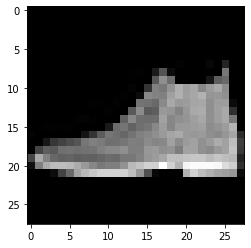

In [12]:
img = X_test[0].reshape(28, 28) # 채널 정보를 넣었으니(CNN), 이를 다시 빼줘야 한다.
img = (img * 255.0).astype(np.int) # 정규화 돌리기 (아까 255로 나눴음)
print(img)
plt.imshow(img, cmap='gray')
plt.show()

#### 실습 문제

In [13]:
model = Sequential()

model.add(InputLayer(input_shape=(X_train.shape[1], X_train.shape[2], X_train.shape[3])))
model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2))
model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

model.summary()

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

begin = time()
model.fit(x=X_train, y=Y_train, epochs=0, batch_size=MY_BATCH, verbose=1) # epochs = 0
end =time()
print("learning time: {:.2f}sec".format(end - begin))

score = model.evaluate(x=X_test, y=Y_test, verbose=1)
print("Total loss: {:.2f}".format(score[0]))
print("Accuracy: {:.2f}".format(score[1]))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 32)        160       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        8256      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               401536    
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

In [14]:
model = Sequential()

model.add(InputLayer(input_shape=(X_train.shape[1], X_train.shape[2], X_train.shape[3])))
model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2))
model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

model.summary()

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

begin = time()
model.fit(x=X_train, y=Y_train, epochs=20, batch_size=MY_BATCH, verbose=1) # epochs = 20
end =time()
print("learning time: {:.2f}sec".format(end - begin))

score = model.evaluate(x=X_test, y=Y_test, verbose=1)
print("Total loss: {:.2f}".format(score[0]))
print("Accuracy: {:.2f}".format(score[1]))

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 32)        160       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 64)        8256      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               401536    
_________________________________________________________________
dense_5 (Dense)              (None, 10)               

In [15]:
model = Sequential()

model.add(InputLayer(input_shape=(X_train.shape[1], X_train.shape[2], X_train.shape[3])))
model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2))
model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

model.summary()

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

begin = time()
model.fit(x=X_train, y=Y_train, epochs=100, batch_size=MY_BATCH, verbose=1) # epochs = 100
end =time()
print("learning time: {:.2f}sec".format(end - begin))

score = model.evaluate(x=X_test, y=Y_test, verbose=1)
print("Total loss: {:.2f}".format(score[0]))
print("Accuracy: {:.2f}".format(score[1]))

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 28, 28, 32)        160       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 14, 64)        8256      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               401536    
_________________________________________________________________
dense_7 (Dense)              (None, 10)               

In [16]:
model = Sequential()

model.add(InputLayer(input_shape=(X_train.shape[1], X_train.shape[2], X_train.shape[3])))
model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2))
model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

model.summary()

model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['acc']) # optimizer=sgd

begin = time()
model.fit(x=X_train, y=Y_train, epochs=MY_EPOCH, batch_size=MY_BATCH, verbose=1)
end =time()
print("learning time: {:.2f}sec".format(end - begin))

score = model.evaluate(x=X_test, y=Y_test, verbose=1)
print("Total loss: {:.2f}".format(score[0]))
print("Accuracy: {:.2f}".format(score[1]))

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 28, 28, 32)        160       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 14, 14, 64)        8256      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               401536    
_________________________________________________________________
dense_9 (Dense)              (None, 10)               

* adam
* sgd
* 최적화 함수: 가중치를 어떻게 보정하는지를 판단함. 즉, 전역 최솟값을 찾는 것이 목표!

In [17]:
model = Sequential()

model.add(InputLayer(input_shape=(X_train.shape[1], X_train.shape[2], X_train.shape[3])))
model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2))
model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

model.summary()

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

begin = time()
model.fit(x=X_train, y=Y_train, epochs=MY_EPOCH, batch_size=16, verbose=1) #batch_size=16
end =time()
print("learning time: {:.2f}sec".format(end - begin))

score = model.evaluate(x=X_test, y=Y_test, verbose=1)
print("Total loss: {:.2f}".format(score[0]))
print("Accuracy: {:.2f}".format(score[1]))

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 28, 28, 32)        160       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 14, 14, 64)        8256      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               401536    
_________________________________________________________________
dense_11 (Dense)             (None, 10)               

In [18]:
model = Sequential()

model.add(InputLayer(input_shape=(X_train.shape[1], X_train.shape[2], X_train.shape[3])))
model.add(Conv2D(filters=32, kernel_size=8, padding='same', activation='relu')) # kernel_size=8
model.add(MaxPool2D(pool_size=2))
model.add(Conv2D(filters=64, kernel_size=8, padding='same', activation='relu')) # kernel_size=8
model.add(MaxPool2D(pool_size=2))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

model.summary()

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

begin = time()
model.fit(x=X_train, y=Y_train, epochs=MY_EPOCH, batch_size=MY_BATCH, verbose=1)
end =time()
print("learning time: {:.2f}sec".format(end - begin))

score = model.evaluate(x=X_test, y=Y_test, verbose=1)
print("Total loss: {:.2f}".format(score[0]))
print("Accuracy: {:.2f}".format(score[1]))

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 28, 28, 32)        2080      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 14, 14, 64)        131136    
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 128)               401536    
_________________________________________________________________
dense_13 (Dense)             (None, 10)               